<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
<font color='green'>         __Exploratory Data Analysis I For 1000 Movies__     </font>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Which year has highest number of movies released that made it to top 1000?](#section401)<br/>
    - 4.2 [How has been the trend of revenues generated from movies over the past decade?](#section402)<br/>
    - 4.3 [How has been the trend of voters, who actually voted, over the period?](#section403)<br/>
    - 4.4 [Critics plays an important role in moulding the opinion of regular movie goers, hence how has been the response of Critics over the period?](#section404)<br/>
    - 4.5 [How people who actually watched the movie reacted to the movies and how alligned their reviews were with the critics' ones ?](#section405)<br/>
    - 4.6 [How has been trend of people, towards differently rated movies over the years ?](#section406)<br/>
    - 4.7 [Is there any other reason , which may affect, overall public count in theaters ?](#section407)<br/>
    - 4.8 [Which genere movie has a major share in Top 1000 movies made from 2006 to 2016 ?](#section408)<br/>
    - 4.9 [Which genere movies have grossed maximum mean revenue between 2006 to 2016 ?](#section409)<br/>
    - 4.10 [Which Director performance has been exemplary based on revenue generated and votes recieved for their movies?](#section410)<br/>

5. [Inference](#section5)<br/>  
6. [Conclusions](#section6)<br/>  



 

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


### 2. Data Loading and Description


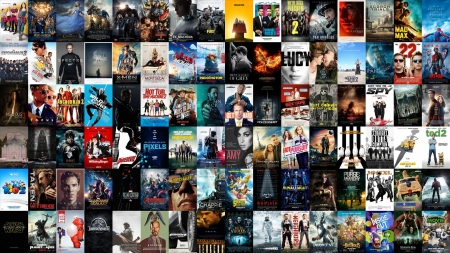

In [1]:
from IPython.display import Image
Image(filename= 'image.png',width= 500)

- The dataset consists of the information about Top 1000 movies release in years from 2006 to 2016. Various variables present in the dataset includes:-

    <font color='blue'> __'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)'.__ </font>

- The dataset comprises of __1000 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Rank          | Rank of the Movie                                        | 
| Title         | Title of the Movie                         |  
| Genre         | Genre of the Movie                                           | 
| Description   | Movie Description                                         |   
| Director      | Director of the Movie                                          |
| Actors        | Actors of the Movie                                          |
| Year                | Year in which that movie was released |
| Runtime (Minutes)   | Length of the Movie|
| Rating              | Rating of the Movie by Auidience                                           |
| Votes               | Votes given by audience                                           |
| Revenue (Millions)  | Revenue Generated by the movie                                              |
| Metascore           | Rating of the Movie by Critics                                            |

### Assumptions:
        1. Only people, who have seen the movie in theaters , have voted.
        2. Individual rating of any movies by audience is unbiased and has been done cautiously.
        3. Metascore is the averaged out score of all the critics.
        4. Revenue data shown is the lifetime box office collection of any movies from theaters.

#### Importing packages     

In [2]:
import numpy as np                           # Implemennts milti-dimensional array and matrice                                              # For data manipulation and analysis
import pandas as pd                          # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt              # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                        # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

#### Importing the Dataset

In [3]:
movie_1000 = pd.read_csv('https://raw.githubusercontent.com/Ashutosh902/Term-1/master/Data/Projects/1000%20movies%20data.csv')
movie_copy = movie_1000.copy(deep = True)

## 3. Data Profiling
- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset
To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [4]:
movie_1000.shape                     #Finding total number of rows and columns in dataset.

(1000, 12)

In [5]:
movie_1000.columns                   #Printing all 12 columns present in the dataset

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [6]:
movie_1000.head()                   #Printing first 5 rows from the dataset

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [7]:
movie_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [8]:
movie_1000.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [9]:
movie_1000.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

From the above output we can see that __Revenue (Millions)__ and __Metascore__ columns contains __maximum null values__. We will see how to deal with them.

### 3.2 Pre Profiling
- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [10]:
profile = pandas_profiling.ProfileReport(movie_1000)
profile.to_file(outputfile="movie_data_before_preprocessing.html")

- In the Dataset info, Total __Missing(%)__ = __1.6%__ 
- Number of __variables__ = __12__ 

### 3.3 Preprocessing
- Finding correlation of the columns,having missing values, with other columns by removing all the __rows__ in the data set having Null/NaN values.<br/>

<font color='green'> __After the analysis, using the correlated columns to deal with missing values of respective colums:__ </font>
- Dealing with missing values<br/>
    - Replacing missing entries of __Metascore.__ with mean values
    - Replacing missing values of __Revenue (Millions)__ with mean values.


In [11]:
# Deleting all the rows having any NaN values
movie_data =movie_1000.drop(list(movie_1000[movie_1000['Revenue (Millions)'].isnull()].index),axis =0)
movie_data =movie_data.drop(list(movie_data[movie_data['Metascore'].isnull()].index),axis =0)
movie_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 12 columns):
Rank                  838 non-null int64
Title                 838 non-null object
Genre                 838 non-null object
Description           838 non-null object
Director              838 non-null object
Actors                838 non-null object
Year                  838 non-null int64
Runtime (Minutes)     838 non-null int64
Rating                838 non-null float64
Votes                 838 non-null int64
Revenue (Millions)    838 non-null float64
Metascore             838 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


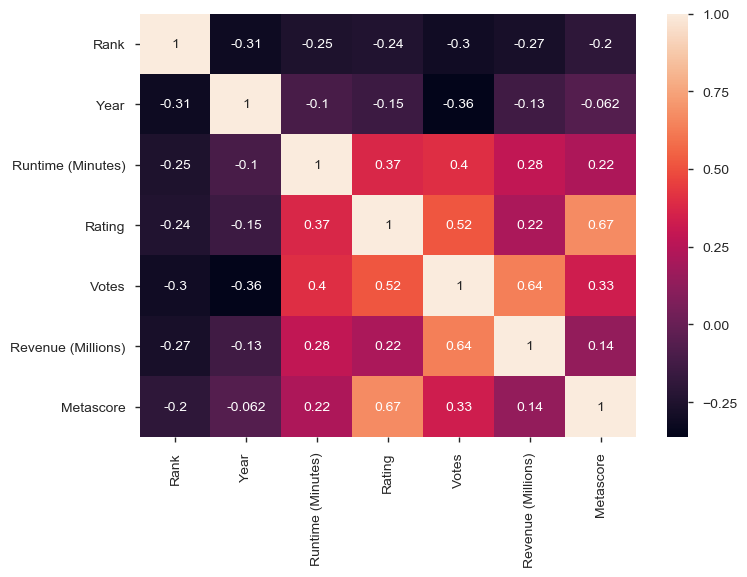

In [12]:
movie_corr_1 = movie_data.corr()
sns.heatmap(movie_corr_1, annot=True)

 In the filtered data there is a strong correlation between <font color='blue'>__metascore__ </font> and <font color='blue'>__rating__ </font> as well as between <font color='blue'>__revenue (millions)__  </font> and <font color='blue'>__votes__ </font>

<font color='blue'>Replacing missing metascore value, in <font color='black'>__movie_1000__</font> ,  with mean of metascores calculated at 
integral value of every rating in <font color='black'>__movie_data__</font> </font> 

In [13]:
movie_data['Rating_floor'] = np.floor(movie_data['Rating'])
movie_1000['Rating_floor'] = np.floor(movie_1000['Rating'])
def mean_metascore(value):    
    return movie_data.groupby('Rating_floor')['Metascore'].mean()[value]
for i in np.floor(movie_1000[movie_1000['Metascore'].isnull()]['Rating']):
    meta_mean = mean_metascore(i)
    x= movie_1000[movie_1000['Metascore'].isnull()]['Rating_floor'].isin([i])
    index_of_meta =x[x].index
    movie_1000.loc[index_of_meta,'Metascore'] = meta_mean

In [14]:
def mean_revenue(value):    
    return movie_data[(movie_data['Votes']>= (value-1000.0)) & (movie_data['Votes'] < (value + 1000.0))]['Revenue (Millions)'].mean()

for yr,vote in pd.DataFrame(movie_1000[movie_1000['Revenue (Millions)'].isnull()].groupby('Year')['Votes'].mean()).itertuples():
    mean_rev = mean_revenue(vote)
    x = movie_1000[movie_1000['Revenue (Millions)'].isnull()]['Year'].isin([yr])
    index_of_rev = x[x].index
    movie_1000.loc[index_of_rev,'Revenue (Millions)'] = mean_rev


Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __movie_data_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

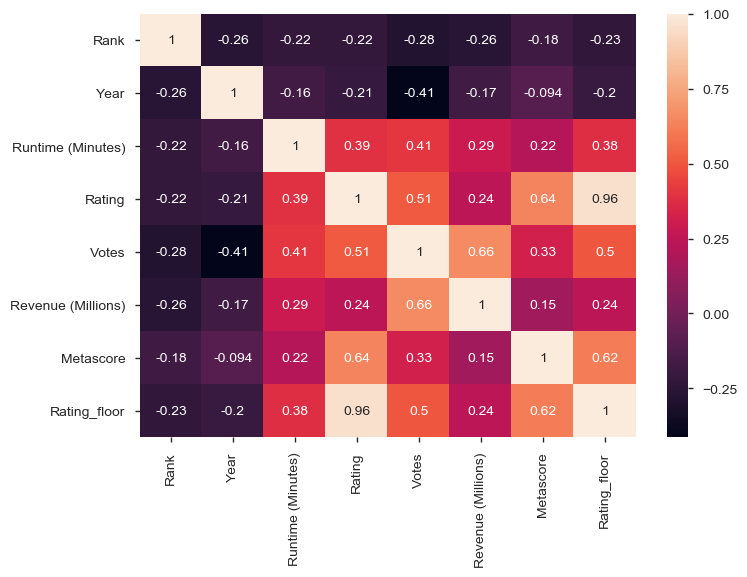

In [15]:
movie_corr_2 = movie_1000.corr()
sns.heatmap(movie_corr_2, annot=True)

## 3.4 Post Pandas Profiling

In [16]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(movie_1000)
profile.to_file(outputfile="movie_data_after_preprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values, we have also introduced new feature named __FamilySize__. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __titanic_after_preprocessing.html__ and titanic_before_preprocessing.html.<br/>
In titanic_after_preprocessing.html report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __13__ 
- Observe the newly created variable Rating_Floor.

In [17]:
movie_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    1000 non-null float64
Metascore             1000 non-null float64
Rating_floor          1000 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 101.6+ KB


### 4. Questions

### 4.1 Which year has highest number of movies released that made it to top 1000?

Text(0,0.5,'Total Number Of Movies')

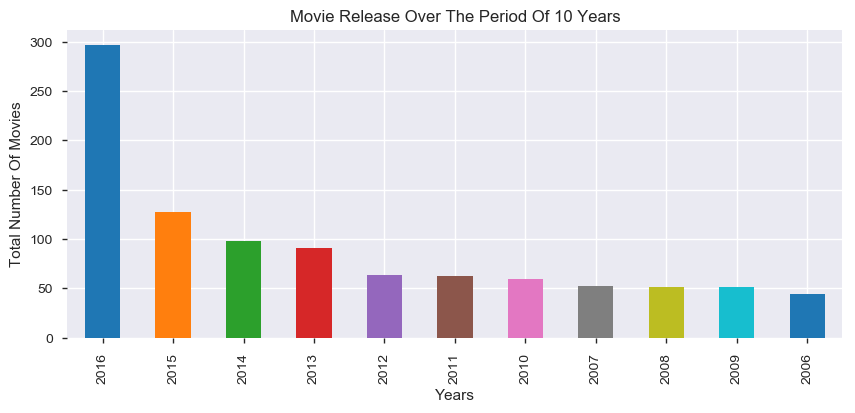

In [18]:
mov_x =movie_1000['Year'].value_counts().plot.bar(figsize =(10,4),title = 'Movie Release Over The Period Of 10 Years')
mov_x.set_xlabel('Years')
mov_x.set_ylabel('Total Number Of Movies')

Most of the movie,which made it Top 1000, were released in 2016.

### 4.2 How has been the trend of revenues generated from movies over the past decade?

#### Visulaizing, total revenue generated by movies releasesd in past 10 years

Text(0,0.5,'Total Revenue Generated')

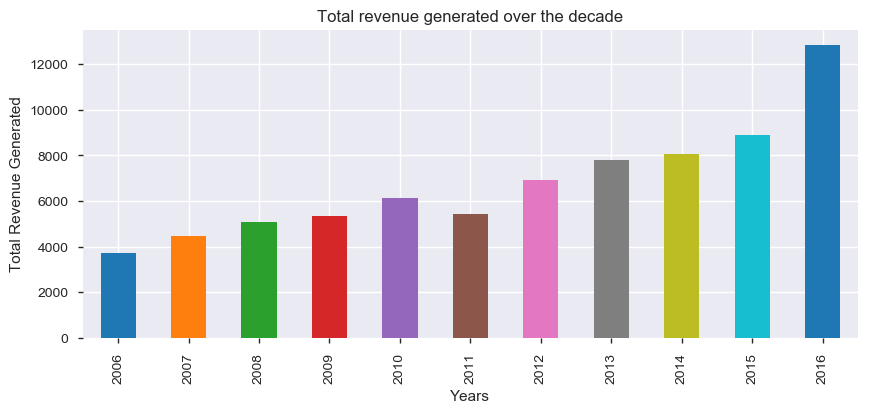

In [19]:
mov_x1 = movie_1000.groupby('Year')['Revenue (Millions)'].sum().plot.bar(figsize =(10,4),title ='Total revenue generated over the decade')
mov_x1.set_xlabel('Years')
mov_x1.set_ylabel('Total Revenue Generated')

#### Visulaizing, average revenue generated by movies releasesd in past 10 years

Text(0,0.5,'Mean Revenue Generated')

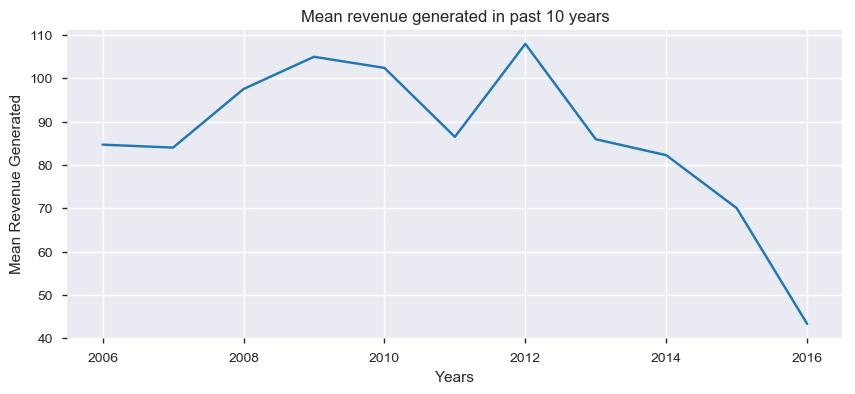

In [20]:
mov_x2 = movie_1000.groupby('Year')['Revenue (Millions)'].mean().plot.line(figsize =(10,4),title ='Mean revenue generated in past 10 years')
mov_x2.set_xlabel('Years')
mov_x2.set_ylabel('Mean Revenue Generated')

#### Total revenue generated coorelates with total movies released, which reached Top 1000, in particular year. But annual average revenue of movies has  <font color='red'>reduced over the period </font>, from 85 Million in 2006 to 43 MIllion in 2016.

### 4.3 How has been the trend of voters, who actually voted, over the period?

#### The graph suggests, less avg numbers of movie goer which resulted in lesser generated revenue

Text(0.5,0,'Years')

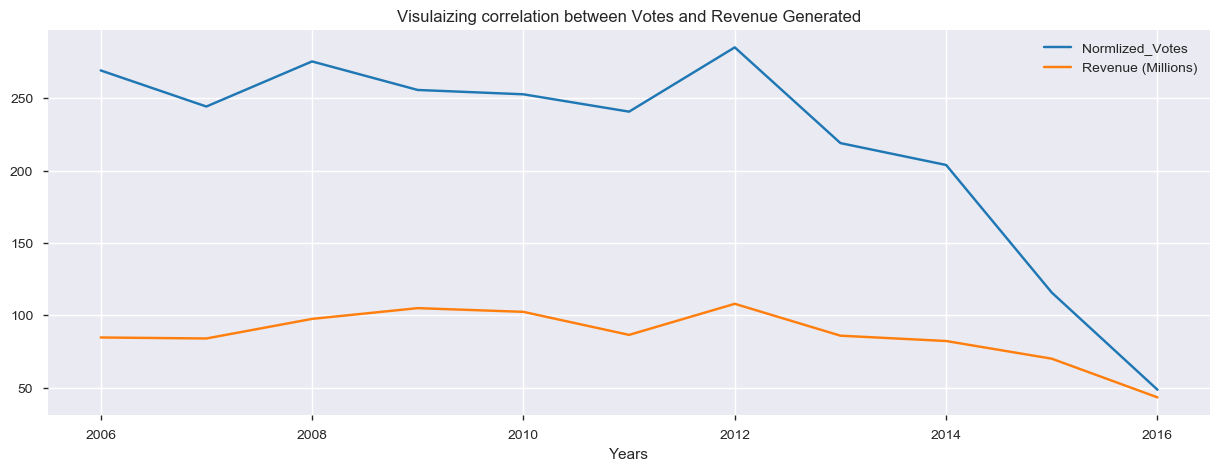

In [21]:
movie_1000['Normlized_Votes'] = movie_1000['Votes']/1000                       #normalizing data for clear visulaization
mov_x3 = movie_1000.groupby('Year')['Normlized_Votes','Revenue (Millions)'].mean().plot.line(subplots=False,figsize = (15,5) , title = 'Visulaizing correlation between Votes and Revenue Generated')
mov_x3.set_xlabel('Years')

#### From above graph it is clear that , due to less footfall in theaters, mean revenue has reduced over the period.

### 4.4 Critics plays an important role in moulding the opinion of regular movie goers, hence how has been the response of Critics over the period?

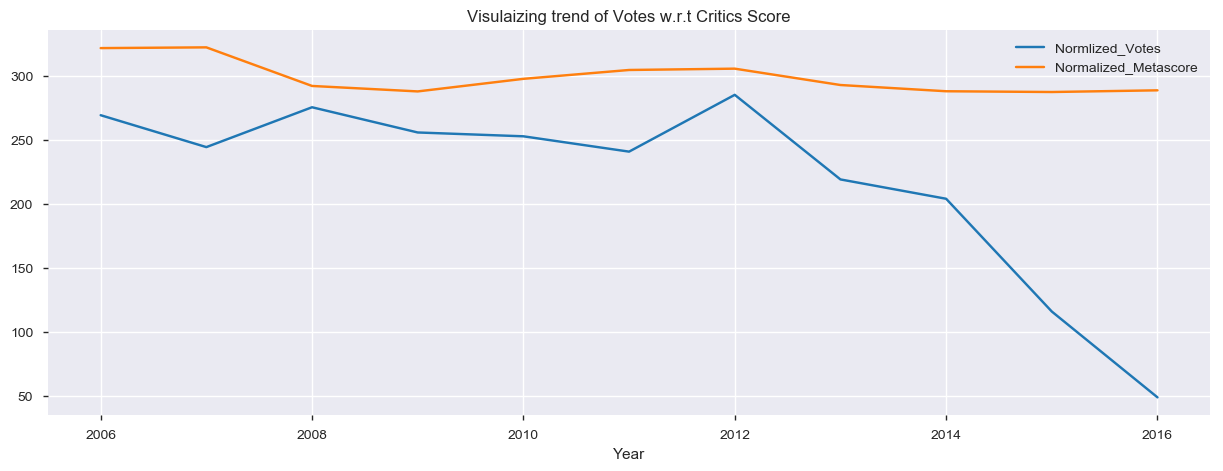

In [22]:
movie_1000['Normlized_Votes'] = movie_1000['Votes']/1000                      #normalizing data for clear visulaization
movie_1000['Normalized_Metascore'] = movie_1000['Metascore']*5                #normalizing data for clear visulaization
movie_1000.groupby('Year')['Normlized_Votes','Normalized_Metascore'].mean().plot.line(subplots=False,figsize = (15,5),title = 'Visulaizing trend of Votes w.r.t Critics Score')

#### Though there has been some negative response from critics side , but score are not damaging enough for the voters/public to stop going to theaters.

##### Some intresting observation:
     From 2006 To 2008 : Crtics didn't play an influencial role in swaying movie goers.
     From 2008 Onwards : Movie goers seems to follow critics and their reviews,as a second opinion before selecting a movie. .  
       

### 4.5 How people who actually watched the movie reacted to the movies and how alligned their reviews were with the critics' ones ?

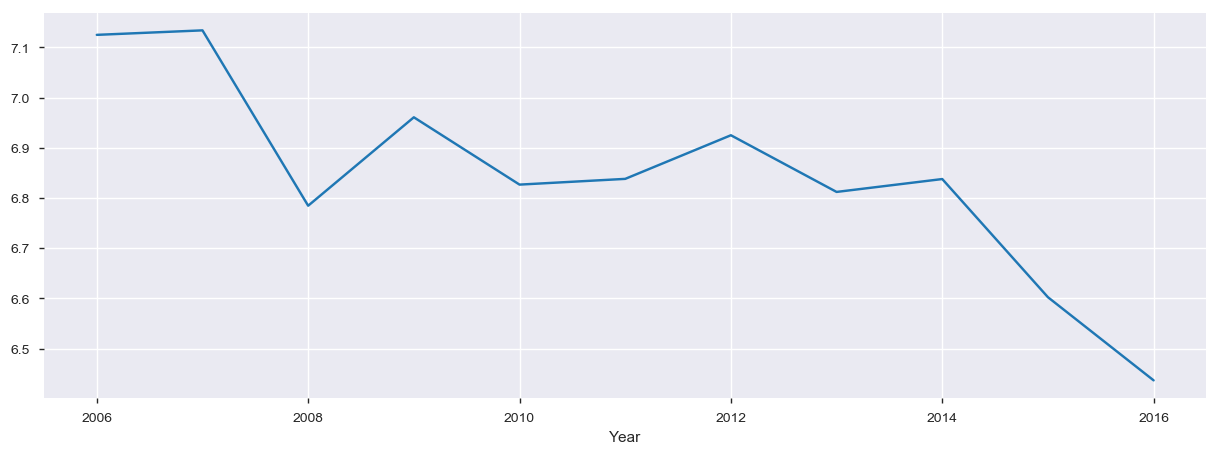

In [23]:
movie_1000.groupby('Year')['Rating'].mean().plot.line(subplots=False,figsize = (15,5))

#### There has been substantial depreciation in mean of rating provided by the voters , specifically from 2012 to 2016.

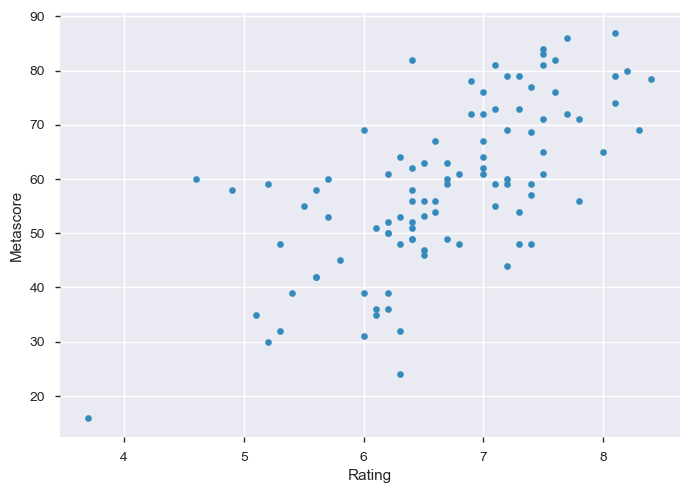

In [24]:
movie_1000[['Rating','Metascore']].sample(100).plot.scatter('Rating','Metascore')

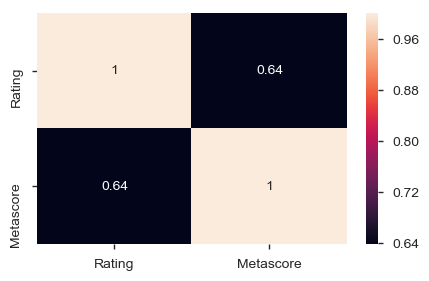

In [25]:
movie_corr = movie_1000[['Rating','Metascore']].corr()
plt.figure(figsize = (5,3))
sns.heatmap(movie_corr, annot=True)

#### From the above trend it is clear that, people are quite alligned with critics' opinion  on whole. 

### 4.6 How has been trend of people, towards differently rated movies over the years ?

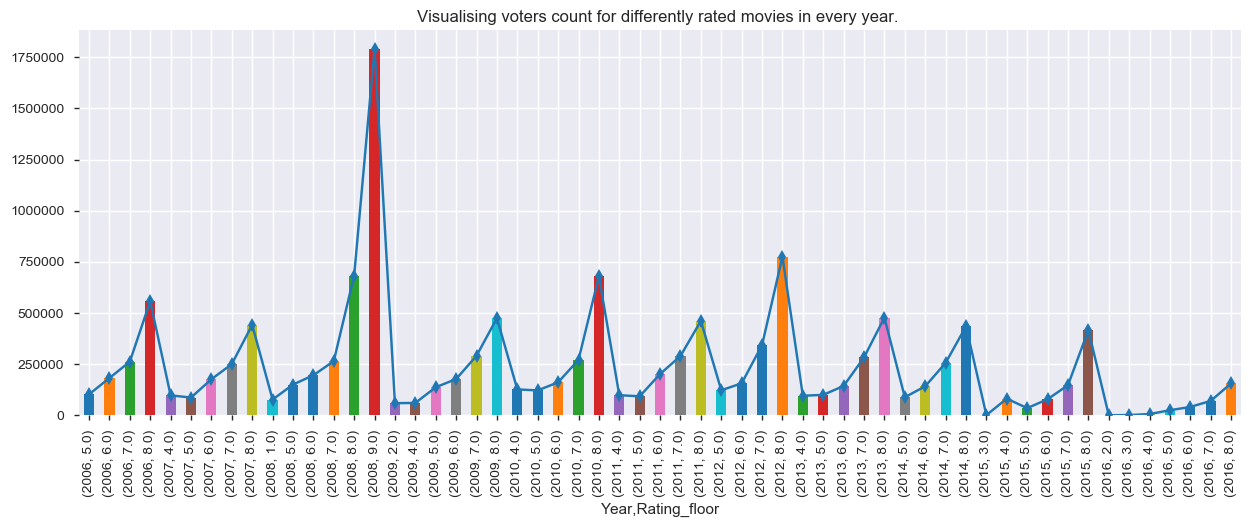

In [26]:
x = movie_1000.groupby(['Year','Rating_floor'])['Votes'].mean()
x.plot(kind='line', marker='d')
x.plot.bar(figsize = (15,5),title = 'Visualising voters count for differently rated movies in every year. ')

#### More and more people have rushed to theaters when a good movie has been released, irrespective of year of release. But the number has drastically reduced in 2016.

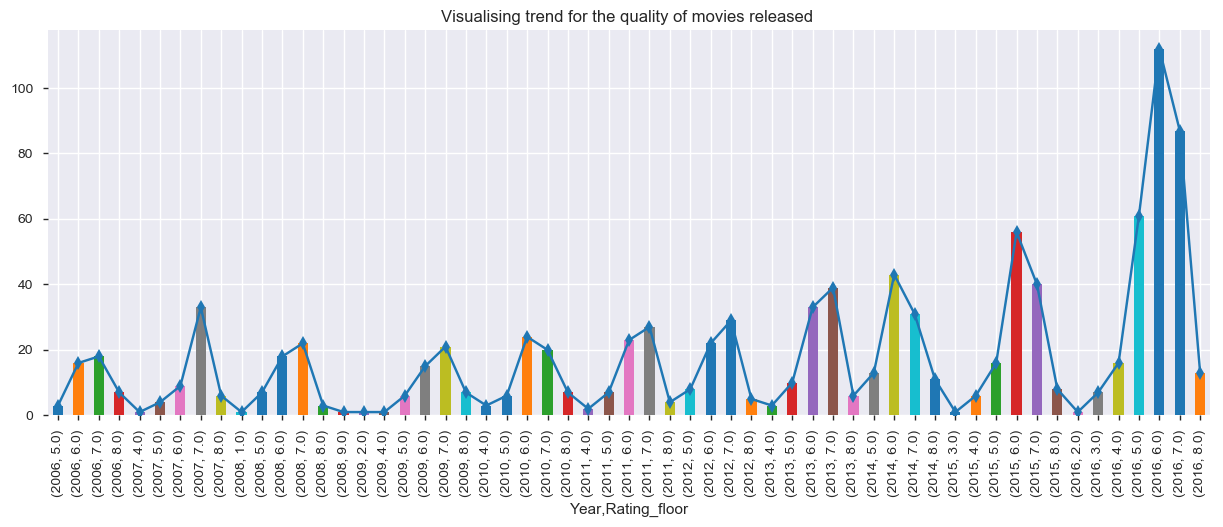

In [27]:
x = movie_1000.groupby(['Year','Rating_floor'])['Votes'].count()
x.plot(kind='line', marker='d')
x.plot.bar(figsize = (15,5),title = 'Visualising trend for the quality of movies released ')

#### There has been slight shift in the quality of movie realesed between 2006 to 2016. From 2006 -2008 , most of the movie relased were rated 7 and above , while as me move ahead in years , no of medicore movies starts to take substanstial share. 

### 4.7 Is there any other reason , which may affect, overall public count in theaters ?


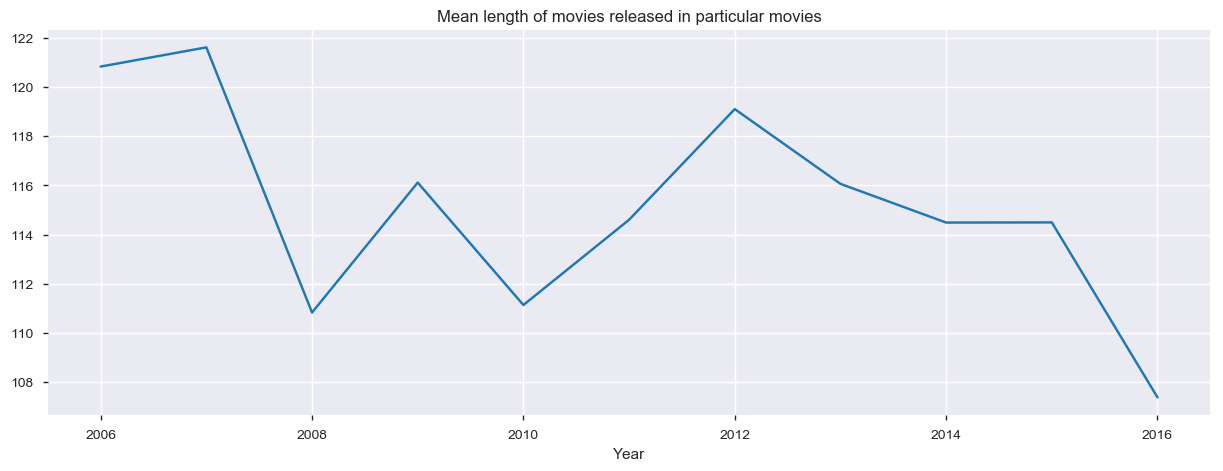

In [28]:
movie_1000.groupby('Year')['Runtime (Minutes)'].mean().plot.line(subplots=False,figsize = (15,5), title = 'Mean length of movies released in particular movies')

#### The graph also shows that movies' runtime has actually reduced from 121 minutes in 2006 to 107 minutes in 2016. Which poofs movies are catering with growing busy schedule and reducing attention span of people.

### 4.8 Which genere movie has a major share in Top 1000 movies made from 2006 to 2016 ?

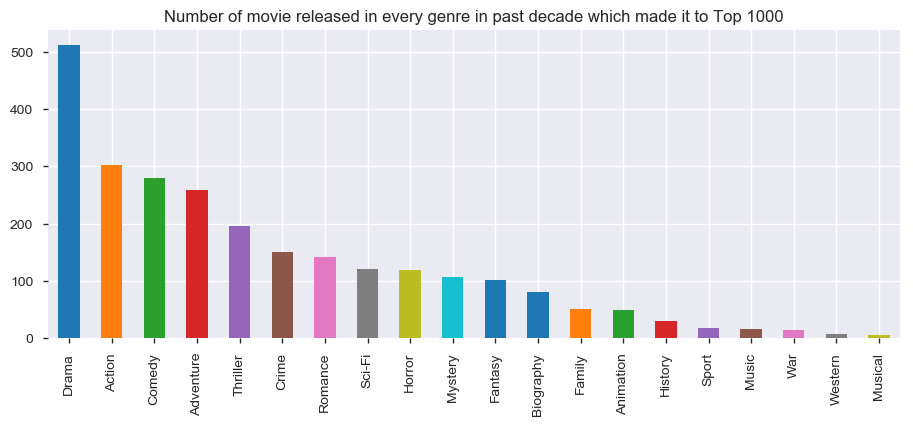

In [29]:
def genre():
    new_list =[]
    value_split = []### 4.7 Which genere movie has a major share in Top 1000 movies made from 2006 to 2016 ?
    for i in range(len(movie_1000)):
        value_split = movie_1000['Genre'].iloc[i].split(',')
        new_list += value_split
    return new_list
x =(pd.DataFrame(genre(),columns=['Genre'])).Genre.value_counts()
x.plot.bar(figsize = (11,4), title = 'Number of movie released in every genre in past decade which made it to Top 1000')

### 4.9 Which genere movies have grossed maximum mean revenue between 2006 to 2016 ?

In [30]:
def genre():
    new_list =[]
    value_split = []
    revenue_list = []
    for i in range(len(movie_1000)):
        value_split = movie_1000['Genre'].iloc[i].split(',')
        new_list += value_split
        revenue_list += ((str(movie_1000['Revenue (Millions)'].iloc[i])+',')*len(value_split)).split(',')[:len(value_split)]
    return new_list,revenue_list
Genre_list,Revenue_list =genre()
z = pd.DataFrame(list(zip(Genre_list,Revenue_list)),columns=['Genre','Revenue (Millions)'])
z['Revenue (Millions)'] = pd.to_numeric(z['Revenue (Millions)'])
y = pd.DataFrame(z.groupby('Genre')['Revenue (Millions)'].mean()).sort_values('Revenue (Millions)',ascending ='True')

#### Showing relation between  <font color='blue'> No of Movies Released and Mean Revenue Generated </font> by movies when grouped based on Genre.

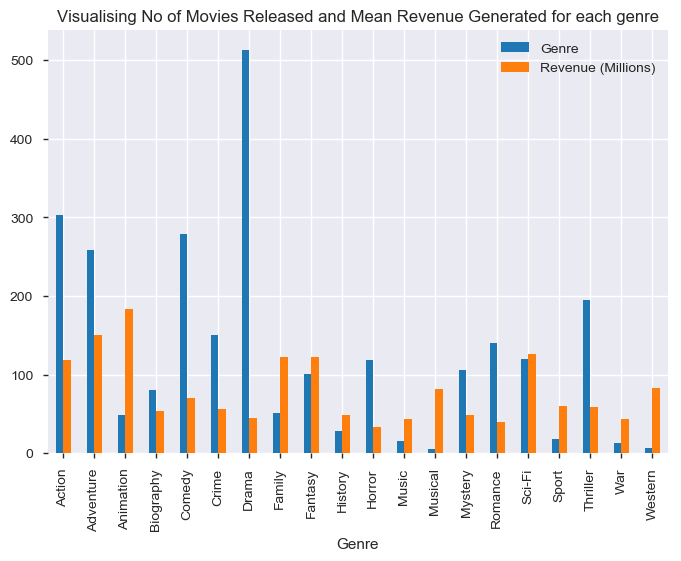

In [37]:
sorted_x = x.sort_index() 
sorted_y = y.sort_index() 
conct_tab = pd.concat([sorted_x,sorted_y], axis =1)
conct_tab.plot.bar(title = 'Visualising No of Movies Released and Mean Revenue Generated for each genre')

#### Animation,Family, Fantasy and Sci-Fi movies have been crowd favourite while Drama, Comedy and Thriller has been least attractive for the movigoers to rush them to theaters.

### 4.10 Which Director performance has been exemplary based on revenue generated and votes recieved for their movies?

In [32]:
import pandas as pd
read_file = pd.read_csv('https://raw.githubusercontent.com/Ashutosh902/Term-1/master/Data/Projects/1000%20movies%20data.csv')
read_file=read_file.drop(list(read_file[read_file['Revenue (Millions)'].isnull()].index),axis = 0)
read_file=read_file.drop(list(read_file[read_file['Metascore'].isnull()].index),axis = 0)
read_file.Director.value_counts().head(50)
read_file_r = read_file.groupby('Director')['Revenue (Millions)'].agg(['mean','count']).sort_values('count',ascending =False)
read_file_v = read_file.groupby('Director')['Votes'].agg(['mean','count']).sort_values('count',ascending =False)

In [33]:
read_file_89 = read_file_r[read_file_r['mean']>89]
read_file_200 = read_file_r[read_file_r['mean']>200]
read_file_200.sort_values('mean',ascending =False).head(2)

,mean,count
Director,,
James Cameron,760.51,1
Colin Trevorrow,652.18,1


In [34]:
read_file_v['mean']=read_file_v['mean']/1000
read_file_v.sort_values('mean',ascending =False).head(2)

,mean,count
Director,,
Christopher Nolan,1311.817,5
James Cameron,935.408,1


In [35]:
read_final=pd.merge(left = read_file_200, right= read_file_v, how ='inner', left_index=True, right_index=True,on ='count')
read_final.columns = ['mean_revenue','count','mean_votes']
read_final['count'] = read_final['count']*100
read_final[['mean_revenue','mean_votes']]

,mean_revenue,mean_votes
Director,,
David Yates,271.751667,338.975667
Michael Bay,236.886667,284.421833
J.J. Abrams,336.690000,434.987400
Christopher Nolan,303.018000,1311.817000
Peter Jackson,215.112500,424.673750
Francis Lawrence,324.952500,406.412250
Jon Favreau,256.400000,411.149500
Gore Verbinski,246.843333,354.347000
Anthony Russo,333.915000,477.009000


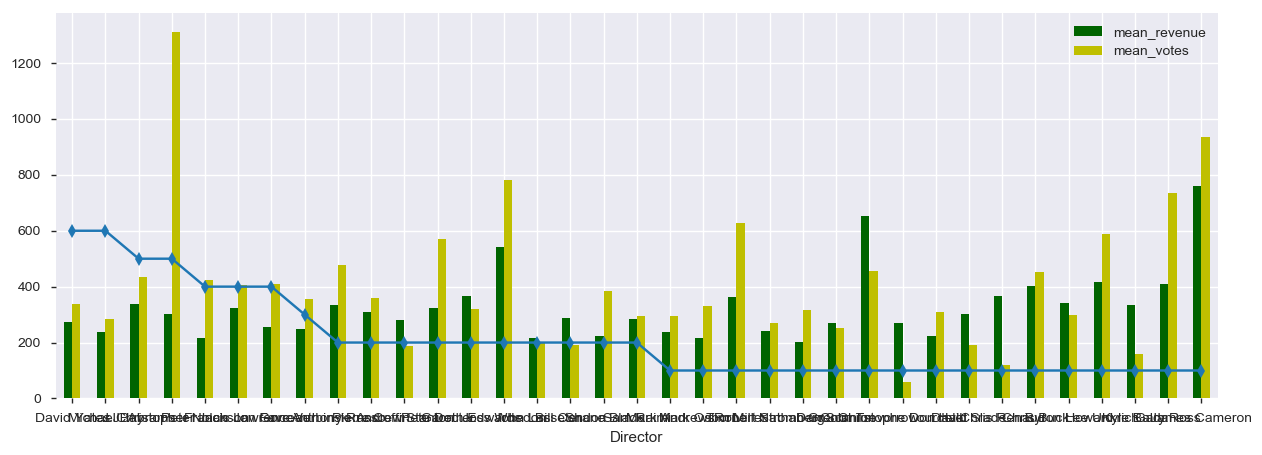

In [36]:
read_final[['mean_revenue','mean_votes']].plot(kind='bar',color = ['DarkGreen','y'],figsize=(15, 5))
read_final['count'].plot(kind='line', marker='d',title = 'Visualising ')

#### Based on above graph , we can mark few observation:
     - Directors such as 
                 - Christopher Nolan, 
                 - Pete Docter,
                 - Joss Whedon
                 - Tim Miller,
                 - Lee Unkrich,
                 - Joss Whedon,
                 - Gary Ross,
                 - James Cameron have been quite popular among audience, resulting above average box-office collection. But Christopher Nolan has topped the list in popularity .
       - Directors such as  
                 - Joss Whedon,
                 - Colin Trevorrow,
                 - Lee Unkrich,
                 - Gary Ross,
                 - James Cameron have directed quite successful movies, resulting outstanding boxoffice collection.But James Cameron has topped the list with his single movie .
       

## 5 Inferences
- Eventhough number of movies getting to top 1000 has increased with years but their mean box-office collection has detoriated at the same time.
- There is strong coorelation between Votes and Revenue, which suggests: the more the people visited theater, the more the people voted and the better the revenue that particular movie earned.
- There is another strong corelation between Rating and Metascore, which suggest: People are quite alligned with critics review and consider critics' opinions before watching the movie, specifically after 2014.
- Decreasing average meatscore and rating indicates detoriation in quality of movie, which as led lesser auidence, votes and revenue.
- Release of mediocre movie (Rating < 7.0), has increased with the time.
- With time, average length of movie has reduced with every increasing year, which indicates towards busy lifestyle among the common masses.
- Movies belonging to Animation and Fantasy genre has attracted grossed extraordinary mean revenue, because of their extravagant theme, which compeles audience to watch them in big screen.
- Joss Whedon, has turned out be the most sucessful director with top 5 mean audience count and mean revenue earned in just 2 movies.

## 6. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data. We also learnt how to _create new features_ which will in turn help us to better predict the survival. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like _Votes, Revenue, Rating and Metascore_ to determine current movie-goers trend.
- There could be other factors which are affecting footfall in theaters, beacuse:
          1. Detroriation in slope of Votes count is quite steeper that falling mean rating , in past 10 years.
          2. People have responded positively whenever a good movie has been released irrespective of their movie_data
other factors could be :
          1. Emergence of online streaming network like Netflix and Amazon Prime.
          2. Easy availablity of movies online, with few days of their release.
          3. Expensive ticket prices and huge rush for movies, demotivates normal movie goers.
     
